# HW 1
The homework assignments is on calibrating the Inertial sensor in our cell phones via the 6-position method. The first part will be to use recorded data to calibrate the accelerometer, the second part will be to calibrate the gyroscopes and the third part will be to analyze recorded data of "shaking the smartphone". Finally, we will compare different phones with one another and with our expectations from their specifications. 


In [49]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../src')
from ins import Accelerometer
from ins import Gyroscope
sys.path.append('../notebooks')
np.set_printoptions(precision=4, suppress=True)


# Load the data in new format
def load_data(person):
    for folder in os.listdir(os.path.join("..", "data", person)):
        df_name = f"{person.lower()}_{folder.lower().replace(' ', '_')}"
        if "Raw Data.csv" in os.listdir(os.path.join("..", "data", person, folder)):
            globals()[df_name] = pd.read_csv(os.path.join("..", "data", person, folder, "Raw Data.csv"))
            print(f"Loaded {df_name} in {folder}")
        elif "Accelerometer.csv" in os.listdir(os.path.join("..", "data", person, folder)):
            # This case means there is also gyroscope data
            globals()[df_name+"_accelerometer"] = pd.read_csv(os.path.join("..", "data", person, folder, "Accelerometer.csv"))
            print(f"Loaded {df_name}_accelerometer in {folder}")
            globals()[df_name+"_gyroscope"] = pd.read_csv(os.path.join("..", "data", person, folder, "Gyroscope.csv"))
            print(f"Loaded {df_name}_gyroscope in {folder}")
        else:
            print(f"Could not find data for {person} in {folder}")


def remove_rows_by_time(df, start_time, end_time):
    return df[(df["Time (s)"] >= start_time) & (df["Time (s)"] <= end_time)]

def get_mean_accelerations(df):
    return df[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])

def get_mean_gyroscopes(df):
    return df[["Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"]].mean().to_numpy().reshape([3,1])


## Elad

### Part 1 - Calculate bias and scale factor assuming no misalignment

In [ ]:
# Load the data in old format
path_accel_300sec_face_up = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_FaceUp")
path_accel_300sec_face_down = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_FaceDown")
path_accel_300sec_side_positive = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_SidePositive")
path_accel_300sec_side_negative = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_SideNegative")
path_accel_300sec_vertical_front = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_VerticalFront")
path_accel_300sec_vertical_back = os.path.join("..", "data", "Elad", "old_format", "Acceleration_300sec_VerticalBack")

elad_acceleration_with_g_300sec_up = pd.read_csv(os.path.join(path_accel_300sec_face_up, "Raw Data.csv")) # This had a delimiter of ","
elad_acceleration_with_g_300sec_down = pd.read_csv(os.path.join(path_accel_300sec_face_down, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_left = pd.read_csv(os.path.join(path_accel_300sec_side_positive, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_right = pd.read_csv(os.path.join(path_accel_300sec_side_negative, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_front = pd.read_csv(os.path.join(path_accel_300sec_vertical_front, "Raw Data.csv"), sep="\t", engine="python")
elad_acceleration_with_g_300sec_back = pd.read_csv(os.path.join(path_accel_300sec_vertical_back, "Raw Data.csv"), sep="\t", engine="python")

# Load data in new format
load_data("Elad")


In [ ]:
# 5sec experiment
START_TIME_BUFFER = 0.1 # seconds to remove from the start
fz_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_up, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fz_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_down, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fx_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_left, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fx_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_right, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fy_up_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_front, START_TIME_BUFFER, 5 + START_TIME_BUFFER))
fy_down_5sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_5sec_back, START_TIME_BUFFER, 5 + START_TIME_BUFFER))

# 60sec experiment
fz_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_up, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fz_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_down, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fx_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_left, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fx_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_right, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fy_up_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_front, START_TIME_BUFFER, 60 + START_TIME_BUFFER))
fy_down_60sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_60sec_back, START_TIME_BUFFER, 60 + START_TIME_BUFFER))

# 300sec experiment
fz_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_up, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fz_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_down, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fx_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_left, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fx_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_right, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fy_up_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_front, START_TIME_BUFFER, 300 + START_TIME_BUFFER))
fy_down_300sec = get_mean_accelerations(remove_rows_by_time(elad_acceleration_with_g_300sec_back, START_TIME_BUFFER, 300 + START_TIME_BUFFER))


In [24]:
g_true = 9.807 # m/s^2

# create sensors objects for the accelerometers for the different time periods (5, 60, 300 seconds)
Elad_acc_300 = Accelerometer(name="Elad accelerometer 300 sec")
Elad_acc_300.set_calibration_data(
    fx_up=fx_up_300sec, fx_down=fx_down_300sec, 
    fy_up=fy_up_300sec, fy_down=fy_down_300sec, 
    fz_up=fz_up_300sec, fz_down=fz_down_300sec, 
    g=g_true)

Elad_acc_60 = Accelerometer(name="Elad accelerometer 60 sec")
Elad_acc_60.set_calibration_data(
    fx_up=fx_up_60sec, fx_down=fx_down_60sec, 
    fy_up=fy_up_60sec, fy_down=fy_down_60sec, 
    fz_up=fz_up_60sec, fz_down=fz_down_60sec, 
    g=g_true)

Elad_acc_5 = Accelerometer(name="Elad accelerometer 5 sec")
Elad_acc_5.set_calibration_data(
    fx_up=fx_up_5sec, fx_down=fx_down_5sec, 
    fy_up=fy_up_5sec, fy_down=fy_down_5sec, 
    fz_up=fz_up_5sec, fz_down=fz_down_5sec, 
    g=g_true)



In [26]:
# Compute bias and scale factor for each accelerometer
bias_300 = Elad_acc_300.compute_bias()
scale_factor_300 = Elad_acc_300.compute_scale_factor()

bias_60 = Elad_acc_60.compute_bias()
scale_factor_60 = Elad_acc_60.compute_scale_factor()

bias_5 = Elad_acc_5.compute_bias()
scale_factor_5 = Elad_acc_5.compute_scale_factor()

# Print stats for each accelerometer
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"bias x: {bias_300[0][0]}\nbias y: {bias_300[1][0]}\nbias z: {bias_300[2][0]}")
print(f"scale factor x: {scale_factor_300[0,0]}\nscale factor y: {scale_factor_300[1,1]}\nscale factor z: {scale_factor_300[2,2]}")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"bias x: {bias_60[0][0]}\nbias y: {bias_60[1][0]}\nbias z: {bias_60[2][0]}")
print(f"scale factor x: {scale_factor_60[0,0]}\nscale factor y: {scale_factor_60[1,1]}\nscale factor z: {scale_factor_60[2,2]}")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"bias x: {bias_5[0][0]}\nbias y: {bias_5[1][0]}\nbias z: {bias_5[2][0]}")
print(f"scale factor x: {scale_factor_5[0,0]}\nscale factor y: {scale_factor_5[1,1]}\nscale factor z: {scale_factor_5[2,2]}")


Stats for Elad accelerometer 300 sec sensors:
bias x: -0.11580537983931194
bias y: -0.10504082275578686
bias z: -0.057055548680196466
scale factor x: -0.002016666269304802
scale factor y: -0.00026151672338376066
scale factor z: 0.009716569750897679
Stats for Elad accelerometer 60 sec sensors:
bias x: -0.1140368923850632
bias y: -0.10328906266615068
bias z: -0.05035368973531007
scale factor x: -0.0016643790938091574
scale factor y: -0.00019218184938495471
scale factor z: 0.009521396546819142
Stats for Elad accelerometer 5 sec sensors:
bias x: -0.1153877166448325
bias y: -0.10373179350145634
bias z: -0.040376637719989006
scale factor x: -0.0016811015112287908
scale factor y: -0.0002307535512788368
scale factor z: 0.008041803009935624


### Part 2 - Calculate Scale Factor, Bias and Misalignment using LSM

In [27]:
# Calculate the errors matrix M = [SF + M | b]
M300 = Elad_acc_300.compute_M_errors_matrix()
M60 = Elad_acc_60.compute_M_errors_matrix()
M10 = Elad_acc_5.compute_M_errors_matrix()

In [28]:
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M300}")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M60}")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M10}")

Stats for Elad accelerometer 300 sec sensors:
M Matrix:
[[-0.002  -0.0069 -0.0047 -0.1133]
 [ 0.0028 -0.0003  0.0055 -0.0857]
 [ 0.0139  0.0002  0.0097 -0.0909]]
Stats for Elad accelerometer 60 sec sensors:
M Matrix:
[[-0.0017  0.0026 -0.0016 -0.0931]
 [-0.0019 -0.0002  0.0069 -0.0844]
 [-0.0115  0.0031  0.0095 -0.0144]]
Stats for Elad accelerometer 5 sec sensors:
M Matrix:
[[-0.0017  0.001  -0.0016 -0.099 ]
 [-0.0016 -0.0002  0.0064 -0.0845]
 [-0.0123  0.0071  0.008  -0.0653]]


### 2.7 - calculate the bias based on average of all three measurements (5 + 60 + 300)


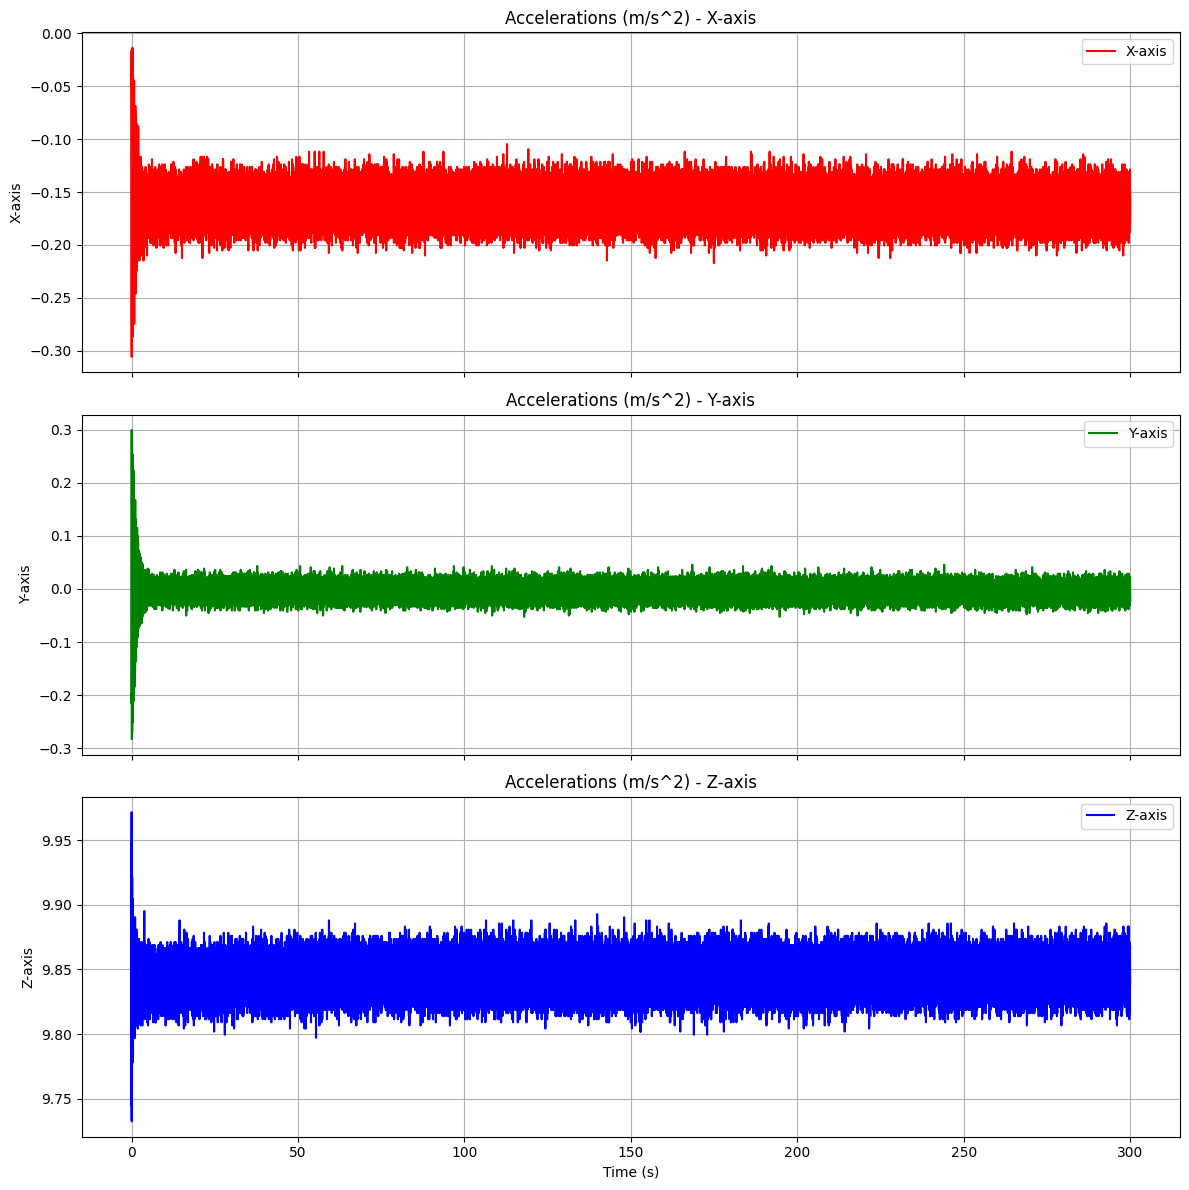

In [33]:
df_to_plot = remove_rows_by_time(elad_acceleration_with_g_300sec_up, 0, 300)
xdata = df_to_plot["Time (s)"].to_numpy()
ydata = df_to_plot[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].to_numpy()
Elad_acc_300.plot_time_series(xdata, ydata, "Accelerations (m/s^2)", "Time (s)")


## Ben

In [ ]:
load_data("Ben")

### Accelerometers

In [42]:
# 5sec experiment
fz_up_5sec = get_mean_accelerations(ben_acceleration_with_g_5)
fz_down_5sec = get_mean_accelerations(ben_acceleration_with_g_5_flip)
fx_up_5sec = get_mean_accelerations(ben_acceleration_with_g_left_5)
fx_down_5sec = get_mean_accelerations(ben_acceleration_with_g_right_5)
fy_up_5sec = get_mean_accelerations(ben_acceleration_with_g_stand_5)
fy_down_5sec = get_mean_accelerations(ben_acceleration_with_g_stand_5_flip)

# 60sec experiment
fz_up_60sec = get_mean_accelerations(ben_acceleration_with_g_60)
fz_down_60sec = get_mean_accelerations(ben_acceleration_with_g_60_flip)
fx_up_60sec = get_mean_accelerations(ben_acceleration_with_g_left_60)
fx_down_60sec = get_mean_accelerations(ben_acceleration_with_g_right_60)
fy_up_60sec = get_mean_accelerations(ben_acceleration_with_g_stand_60)
fy_down_60sec = get_mean_accelerations(ben_acceleration_with_g_stand_60_flip)

# 300sec experiment
fz_up_300sec = get_mean_accelerations(ben_acceleration_with_g_300)
fz_down_300sec = get_mean_accelerations(ben_acceleration_with_g_300_flip)
fx_up_300sec = get_mean_accelerations(ben_acceleration_with_g_left_300)
fx_down_300sec = get_mean_accelerations(ben_acceleration_with_g_right_300)
fy_up_300sec = get_mean_accelerations(ben_acceleration_with_g_stand_300)
fy_down_300sec = get_mean_accelerations(ben_acceleration_with_g_stand_300_flip)

In [ ]:
g_true = 9.807 # m/s^2

# create sensors objects for the accelerometers for the different time periods (5, 60, 300 seconds)
Ben_acc_300 = Accelerometer(name="Ben accelerometer 300 sec")
Ben_acc_300.set_calibration_data(
    fx_up=fx_up_300sec, fx_down=fx_down_300sec, 
    fy_up=fy_up_300sec, fy_down=fy_down_300sec, 
    fz_up=fz_up_300sec, fz_down=fz_down_300sec, 
    g=g_true)

Ben_acc_60 = Accelerometer(name="Ben accelerometer 60 sec")
Ben_acc_60.set_calibration_data(
    fx_up=fx_up_60sec, fx_down=fx_down_60sec, 
    fy_up=fy_up_60sec, fy_down=fy_down_60sec, 
    fz_up=fz_up_60sec, fz_down=fz_down_60sec, 
    g=g_true)

Ben_acc_5 = Accelerometer(name="Ben accelerometer 5 sec")
Ben_acc_5.set_calibration_data(
    fx_up=fx_up_5sec, fx_down=fx_down_5sec, 
    fy_up=fy_up_5sec, fy_down=fy_down_5sec, 
    fz_up=fz_up_5sec, fz_down=fz_down_5sec, 
    g=g_true)


In [44]:
# Compute bias and scale factor for each accelerometer
bias_300 = Ben_acc_300.compute_bias()
scale_factor_300 = Ben_acc_300.compute_scale_factor()

bias_60 = Ben_acc_60.compute_bias()
scale_factor_60 = Ben_acc_60.compute_scale_factor()

bias_5 = Ben_acc_5.compute_bias()
scale_factor_5 = Ben_acc_5.compute_scale_factor()

# Print stats for each accelerometer
print(f"Stats for {Ben_acc_300.get_sensor_name()} sensors:")
print(f"bias x: {bias_300[0][0]}\nbias y: {bias_300[1][0]}\nbias z: {bias_300[2][0]}")
print(f"scale factor x: {scale_factor_300[0,0]}\nscale factor y: {scale_factor_300[1,1]}\nscale factor z: {scale_factor_300[2,2]}")

print(f"Stats for {Ben_acc_60.get_sensor_name()} sensors:")
print(f"bias x: {bias_60[0][0]}\nbias y: {bias_60[1][0]}\nbias z: {bias_60[2][0]}")
print(f"scale factor x: {scale_factor_60[0,0]}\nscale factor y: {scale_factor_60[1,1]}\nscale factor z: {scale_factor_60[2,2]}")

print(f"Stats for {Ben_acc_5.get_sensor_name()} sensors:")
print(f"bias x: {bias_5[0][0]}\nbias y: {bias_5[1][0]}\nbias z: {bias_5[2][0]}")
print(f"scale factor x: {scale_factor_5[0,0]}\nscale factor y: {scale_factor_5[1,1]}\nscale factor z: {scale_factor_5[2,2]}")


Stats for Ben accelerometer 300 sec sensors:
bias x: 0.07104652421503133
bias y: -0.29460292006660715
bias z: 0.0544890301794716
scale factor x: 0.006733391143199676
scale factor y: 0.006733225078389019
scale factor z: 0.0015967559456221902
Stats for Ben accelerometer 60 sec sensors:
bias x: 0.06749924307082633
bias y: -0.2968754285847526
bias z: 0.006479777906631234
scale factor x: 0.006733613440729232
scale factor y: 0.006578694715697894
scale factor z: 0.006375467223121591
Stats for Ben accelerometer 5 sec sensors:
bias x: 0.06584400520497802
bias y: -0.29462508303169876
bias z: 0.0011682892849353976
scale factor x: 0.0072938959132336206
scale factor y: 0.00662982155359589
scale factor z: 0.006998875375666723


#### Now assume misalignments

In [45]:
# Calculate the errors matrix M = [SF + M | b]
M300 = Ben_acc_300.compute_M_errors_matrix()
M60 = Ben_acc_60.compute_M_errors_matrix()
M10 = Ben_acc_5.compute_M_errors_matrix()
print(f"Stats for {Ben_acc_300.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M300}")
print(f"Stats for {Ben_acc_60.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M60}")
print(f"Stats for {Ben_acc_5.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M10}")

Stats for Ben accelerometer 300 sec sensors:
M Matrix:
[[ 0.0067 -0.0024 -0.01    0.0499]
 [ 0.0004  0.0067  0.0029 -0.2159]
 [ 0.0383 -0.0022  0.0016 -0.1319]]
Stats for Ben accelerometer 60 sec sensors:
M Matrix:
[[ 0.0067 -0.0057 -0.0055  0.0866]
 [-0.0022  0.0066  0.0055 -0.212 ]
 [ 0.0289 -0.0023  0.0064 -0.1243]]
Stats for Ben accelerometer 5 sec sensors:
M Matrix:
[[ 0.0073  0.0018 -0.0012  0.0464]
 [ 0.0015  0.0066  0.0079 -0.2153]
 [ 0.0381 -0.0005  0.007  -0.1426]]


### Gyroscopes

In [ ]:
# 5sec experiment
wz_up_5sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_5)
wz_down_5sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_5_flip)

# 60sec experiment
wz_up_60sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_60)
wz_down_60sec = get_mean_gyroscopes(ben_gyroscope_rotation_rate_60_flip)

# 3.2 scenario
# wz_up_scenario_32 = get_mean_gyroscopes(ben_gyroscope_rotation_rate_3_2_scenario)
